In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [3]:
from keras.utils import to_categorical


#### Loading the Dataset

In [4]:
diabetic=load_diabetes()

In [5]:
df=pd.DataFrame(data=diabetic.data,columns=diabetic.feature_names)
df['target']=diabetic.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### information about dataset

In [6]:
#First 5 rows of dataset
df_rows=df.head()
for index,rows in df_rows.iterrows():
    print(f'Row:{index+1}')
    print(rows)

Row:1
age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019907
s6         -0.017646
target    151.000000
Name: 0, dtype: float64
Row:2
age       -0.001882
sex       -0.044642
bmi       -0.051474
bp        -0.026328
s1        -0.008449
s2        -0.019163
s3         0.074412
s4        -0.039493
s5        -0.068332
s6        -0.092204
target    75.000000
Name: 1, dtype: float64
Row:3
age         0.085299
sex         0.050680
bmi         0.044451
bp         -0.005670
s1         -0.045599
s2         -0.034194
s3         -0.032356
s4         -0.002592
s5          0.002861
s6         -0.025930
target    141.000000
Name: 2, dtype: float64
Row:4
age        -0.089063
sex        -0.044642
bmi        -0.011595
bp         -0.036656
s1          0.012191
s2          0.024991
s3         -0.036038
s4          0.034309
s5          0.022688
s6         -0.009362
target    20

In [7]:
#Shape of the dataset
num_rows,num_cols=df.shape
print('Shape:',df.shape)
num_features=num_cols-1
print(f'Number of features:{num_features}')
print(f'Number of rows:{num_rows}')
print(f'Number of columns:{num_cols}')

Shape: (442, 11)
Number of features:10
Number of rows:442
Number of columns:11


In [8]:
#Describtive status
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,442.0,-0.00,0.05,-0.11,-0.04,0.01,0.04,0.11
sex,442.0,0.00,0.05,-0.04,-0.04,-0.04,0.05,0.05
bmi,442.0,-0.00,0.05,-0.09,-0.03,-0.01,0.03,0.17
bp,442.0,-0.00,0.05,-0.11,-0.04,-0.01,0.04,0.13
s1,442.0,-0.00,0.05,-0.13,-0.03,-0.00,0.03,0.15
s2,442.0,0.00,0.05,-0.12,-0.03,-0.00,0.03,0.20
s3,442.0,-0.00,0.05,-0.10,-0.04,-0.01,0.03,0.18
s4,442.0,-0.00,0.05,-0.08,-0.04,-0.00,0.03,0.19
s5,442.0,0.00,0.05,-0.13,-0.03,-0.00,0.03,0.13
s6,442.0,0.00,0.05,-0.14,-0.03,-0.00,0.03,0.14


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
#checking for null values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

##### No null values

In [11]:
#checking for duplicated values
df.duplicated().sum()

0

##### No duplicated values

In [37]:
x=diabetic.data
df['target']=diabetic.target
y=diabetic.target

In [39]:
#Standardise the features
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)



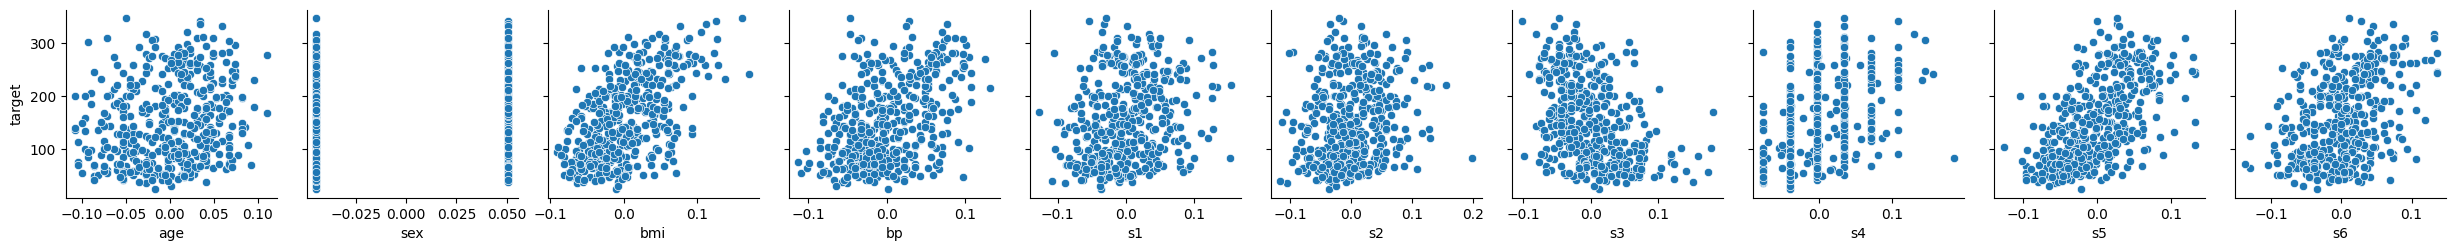

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df,x_vars=diabetic.feature_names,y_vars='target')
plt.show()

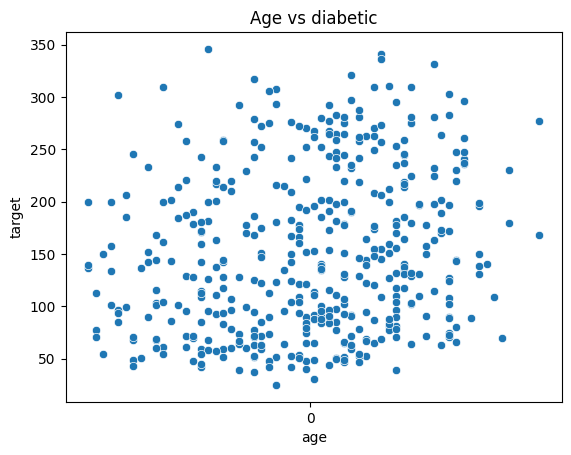

In [48]:
sns.scatterplot(data=df,x='age',y='target')
plt.title("Age vs diabetic")
plt.xticks(np.arange(0,1,1))
plt.show()

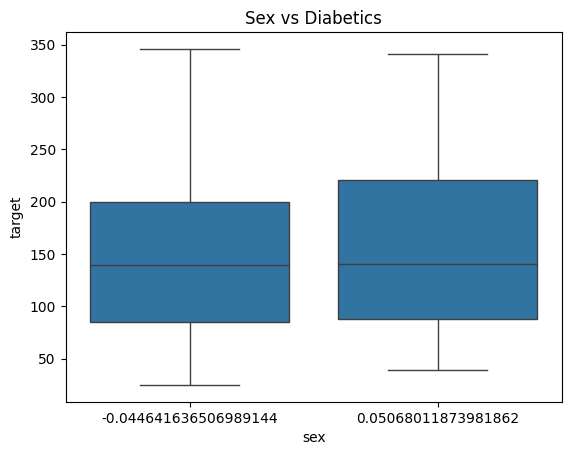

In [49]:
sns.boxplot(data=df,x='sex',y='target')
plt.title("Sex vs Diabetics")
plt.show()

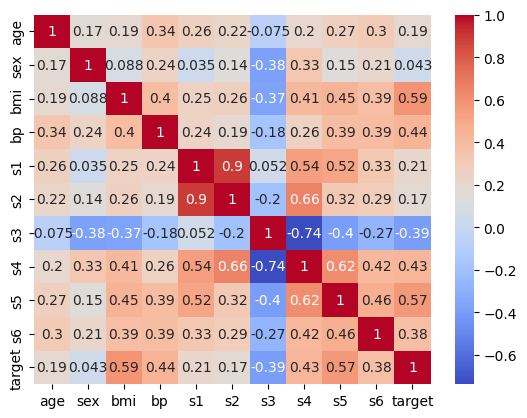

In [51]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [54]:
#splitting the data into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [55]:
#Converting labels to one-hot encoding
y_train=to_categorical(Y_train,num_classes=347)
y_test=to_categorical(Y_test,num_classes=347)

In [58]:
#Creating an Artificial Neural Network model
dim=y_train.shape[1]
model=Sequential()
model.add(Dense(100,activation='relu',input_dim=10))
model.add(Dense(50,activation='relu'))
model.add(Dense(dim,activation='softmax'))

C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
#Train the model
history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8065 - loss: 0.7770 
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.7694
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.7221
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8567 - loss: 0.6725
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8242 - loss: 0.6911
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.6866
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8531 - loss: 0.6935
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.7300
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.6767
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8267 - loss: 0.6938
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.6953 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

In [85]:
X_train.shape

(353, 10)

In [62]:
y_test.shape

(89, 347)

In [63]:
X_test.shape

(89, 10)

In [64]:
#Evaluate the model on the test set
loss,accuracy=model.evaluate(X_test,y_test)
print('Test loss',loss)
print('Test accuracy',accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 21.3135  
Test loss 20.808860778808594
Test accuracy 0.0


In [65]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │           1,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 347)                 │          17,697 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,543 (279.47 KB)

 Trainable params: 23,847 (93.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,696 (186.32 KB)

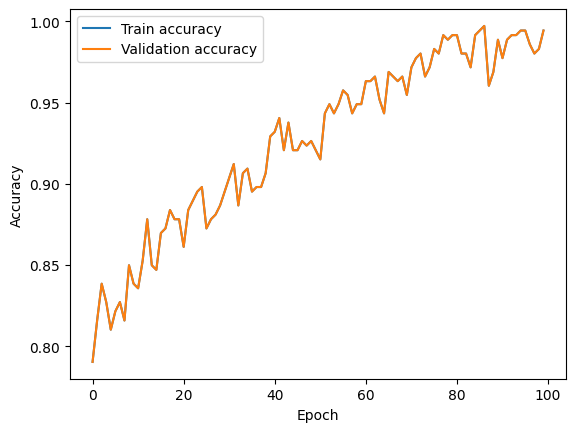

In [67]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

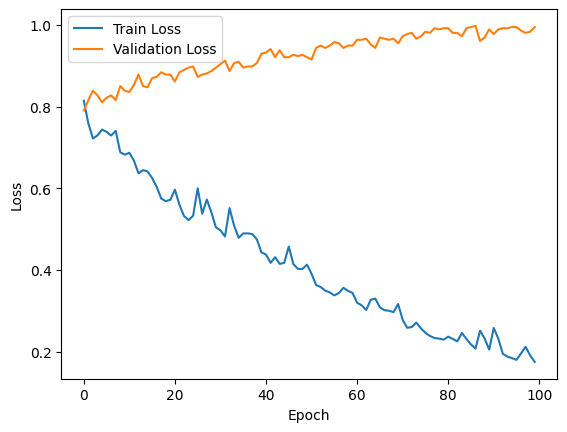

In [68]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
#model Evaluation
from sklearn.metrics import mean_squared_error, r2_score


X_test = model.predict(X_test)


mse = mean_squared_error(X_test, y_test)


r2 = r2_score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Mean Squared Error: 0.00423044051917687
R² Score: -1.8843527612225303e+20


In [70]:
# Print shapes of x_train and x_test
print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
n_samples = 30883 // 10  # This should be an integer
# Ensure x_test is in the right shape
if X_test.shape[1] != num_features:
    # Check if we can reshape by truncating or adjusting data
    if X_test.size % num_features == 0:
        X_test = X_test.reshape(-1, num_features)
    else:
        print("Warning: x_test cannot be reshaped to have the desired number of features.")
        # You might consider truncating or handling the data here

x_train shape: (353, 10)
x_test shape: (89, 347)


In [82]:
if X_test.shape[1] != num_features:
    X_test = X_test.reshape(-1, num_features)

ValueError: cannot reshape array of size 30883 into shape (10)

In [84]:
# Assuming you want to select the first 10 features directly from the NumPy array
X_test = X_test[:, :10]  # Select the first 10 columns

print(f"Adjusted x_test shape: {X_test.shape}")  # Should be (89, 10) if aligned correctly

Adjusted x_test shape: (89, 10)


In [72]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error: 0.00423044051917687
R² Score: -0.03477380758335013


In [74]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=10))  # Increased neurons
model.add(Dense(128, activation='tanh', input_dim=10))  # Using tanh

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Added more hidden layers
model.add(Dense(347, activation='softmax'))

In [75]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
from keras.callbacks import EarlyStopping
#Use early stopping to prevent overfitting and save computation time

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [77]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=10))
model.add(Dropout(0.5))  # Dropout added

In [88]:
# Assuming you have already defined your model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))  # Adjust num_features as necessary
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Assuming this is a regression problem; change if classification

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # You can also add other metrics as needed
train = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0636 - mae: 0.1988 - val_loss: 0.0324 - val_mae: 0.1361
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - mae: 0.1167 - val_loss: 0.0182 - val_mae: 0.1052
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - mae: 0.0790 - val_loss: 0.0116 - val_mae: 0.0749
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 - mae: 0.0616 - val_loss: 0.0095 - val_mae: 0.0688
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0078 - mae: 0.0561 - val_loss: 0.0086 - val_mae: 0.0632


In [89]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mae: 0.0385
Test Loss: 0.004355790093541145
Test Accuracy: 0.03850002586841583


In [90]:
# Ensure your model is compiled
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



In [92]:
# Check the shapes before evaluating
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Now evaluate the model
if X_test.shape[0] == y_test.shape[0]:  # Check if the number of samples match
    loss, mae = model.evaluate(X_test, y_test)
    print("Test Loss (MSE):", loss)
    print("Test Mean Absolute Error (MAE):", mae)
else:
    print("Mismatch in sample sizes: x_test has", X_test.shape[0], "samples; y_test has", y_test.shape[0], "samples.")

x_test shape: (89, 10)
y_test shape: (89, 347)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mae: 0.0385 
Test Loss (MSE): 0.004355790093541145
Test Mean Absolute Error (MAE): 0.03850002586841583


In [93]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# Ensure your model is compiled
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Now evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print("Test Loss (MSE):", loss)
print("Test Mean Absolute Error (MAE):", mae)

x_train shape: (353, 10)
x_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28353.5684 - mae: 150.2375  
Test Loss (MSE): 26560.513671875
Test Mean Absolute Error (MAE): 145.8170623779297
